In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [19]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(directory='C:/Users/Dell/OneDrive/Desktop/intelimagedataset/seg_train',target_size=(50,50),shuffle=True)
test_dataset = test.flow_from_directory(directory="C:/Users/Dell/OneDrive/Desktop/intelimagedataset/seg_test",target_size=(50,50),shuffle=True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


[9, 11, 8, 30, 6, 9, 17, 14, 31, 15]


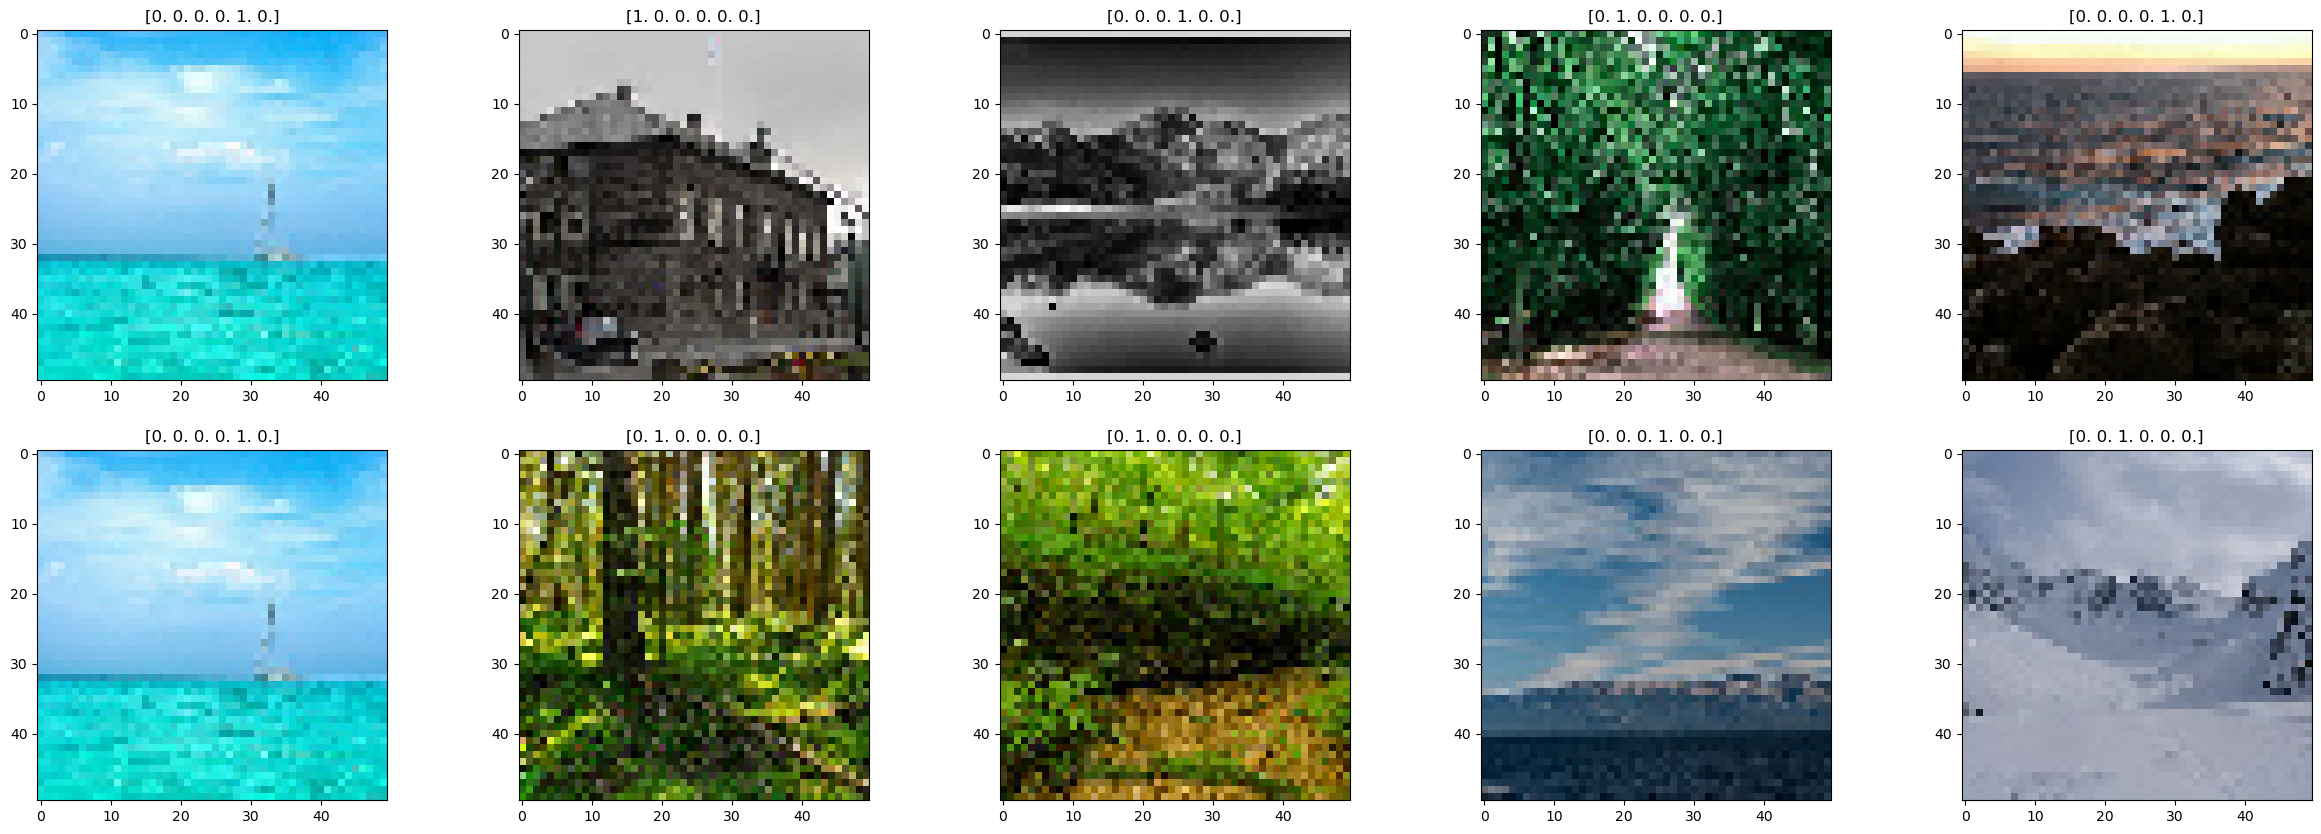

In [23]:
indices = [np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(30,10))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()


In [25]:
values = list(train_dataset.class_indices.values())
keys = list(train_dataset.class_indices.keys())

dics = list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)
mappings

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [27]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
kernel_regularizer = keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))


model.summary()


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 50)     │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24, 24, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 22, 22, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 75)     │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 11, 11, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 75)       │        50,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 9, 9, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        60,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,575 (760.06 KB)

 Trainable params: 194,575 (760.06 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
history = model.fit(train_dataset,batch_size=80,epochs=10,validation_data=test_dataset)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 422s 940ms/step - accuracy: 0.4116 - loss: 1.4149 - val_accuracy: 0.6230 - val_loss: 1.0562
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 77s 176ms/step - accuracy: 0.6249 - loss: 0.9697 - val_accuracy: 0.6783 - val_loss: 0.9434
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 73s 165ms/step - accuracy: 0.6687 - loss: 0.8686 - val_accuracy: 0.7190 - val_loss: 0.8555
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 74s 168ms/step - accuracy: 0.7233 - loss: 0.7444 - val_accuracy: 0.7567 - val_loss: 0.7230
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 72s 164ms/step - accuracy: 0.7567 - loss: 0.6928 - val_accuracy: 0.7603 - val_loss: 0.6866
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.7933 - loss: 0.5897 - val_accuracy: 0.7547 - val_loss: 0.7034
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 122s 278ms/step - accuracy: 0.7986 - loss: 0.5921 - val_accuracy: 0.7997 - val_loss: 0.5872
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 81s 185ms/step - accuracy: 0.8228 - loss:

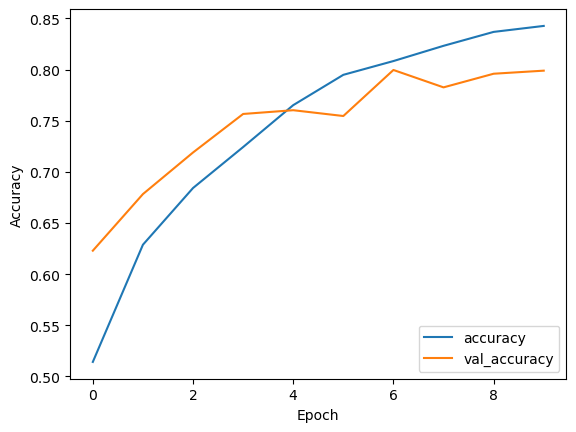

In [38]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')